# 1. На основании данных рейтинга top500 спрогнозировать  производительность компьютера №1 в 2025
(50%)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV



In [2]:
df = pd.read_json('top500.json')
df

,1993-06-01,1993-11-01,1994-06-01,1994-11-01,1995-06-01,1995-11-01,1996-06-01,1996-11-01,1997-06-01,1997-11-01,...,2017-11-01,2018-06-01,2018-11-01,2019-06-01,2019-11-01,2020-06-01,2020-11-01,2021-06-01,2021-11-01,2022-06-01
Sum,"[1100.0, GFlop/s]","[1500.0, GFlop/s]","[2300.0, GFlop/s]","[2700.0, GFlop/s]","[3900.0, GFlop/s]","[4800.0, GFlop/s]","[5900.0, GFlop/s]","[8000.0, GFlop/s]","[12800.0, GFlop/s]","[16900.0, GFlop/s]",...,"[849600000.0, GFlop/s]","[1200000000.0, GFlop/s]","[1400000000.0, GFlop/s]","[1600000000.0, GFlop/s]","[1600000000.0, GFlop/s]","[2200000000.0, GFlop/s]","[2400000000.0, GFlop/s]","[2800000000.0, GFlop/s]","[3000000000.0, GFlop/s]","[4400000000.0, GFlop/s]"
#1,"[59.7, GFlop/s]","[124.0, GFlop/s]","[143.4, GFlop/s]","[170.0, GFlop/s]","[170.0, GFlop/s]","[170.0, GFlop/s]","[220.4, GFlop/s]","[368.2, GFlop/s]","[1100.0, GFlop/s]","[1300.0, GFlop/s]",...,"[93000000.0, GFlop/s]","[122300000.0, GFlop/s]","[143500000.0, GFlop/s]","[148600000.0, GFlop/s]","[148600000.0, GFlop/s]","[415500000.0, GFlop/s]","[442000000.0, GFlop/s]","[442000000.0, GFlop/s]","[442000000.0, GFlop/s]","[1100000000.0, GFlop/s]"
#500,"[0.4, GFlop/s]","[0.5, GFlop/s]","[0.8, GFlop/s]","[1.2, GFlop/s]","[2.0, GFlop/s]","[2.5, GFlop/s]","[3.3, GFlop/s]","[4.6, GFlop/s]","[7.7, GFlop/s]","[9.5, GFlop/s]",...,"[548700.0, GFlop/s]","[715600.0, GFlop/s]","[874800.0, GFlop/s]","[1000000.0, GFlop/s]","[1100000.0, GFlop/s]","[1200000.0, GFlop/s]","[1300000.0, GFlop/s]","[1500000.0, GFlop/s]","[1600000.0, GFlop/s]","[1600000.0, GFlop/s]"


In [3]:
X = df.loc['#1',].index
y = df.loc['#1',].apply(lambda x: x[0])

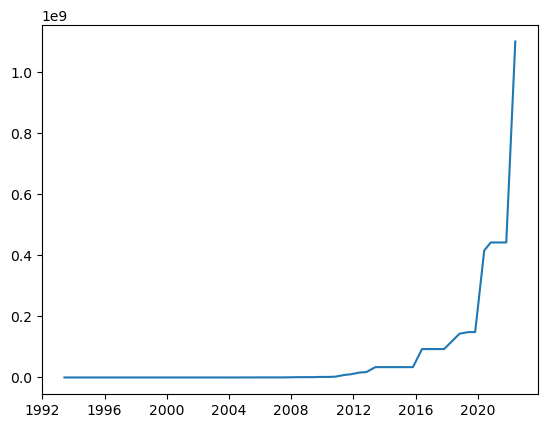

In [4]:
# Посмотрим на график производительности суперкомпьютера №1 по годам
plt.plot(X,y)

Обучим линейную регрессию на прологарифмированном таргете с использованием полиномминальных признаков

In [5]:
A = np.arange(59).reshape(59,1)

In [6]:
# Проиндексируем 2025-06-01
Date_2025= np.array([65]).reshape(-1, 1)
Date_2025

array([[65]])

In [7]:
pipeline = Pipeline(
[
('poly', PolynomialFeatures()),
('lr', LinearRegression())
])

param_grid = [
            {'poly__degree': np.arange(3, 10)}
            ]

grid = GridSearchCV(pipeline, cv=10, param_grid=param_grid, scoring='neg_mean_squared_error')
grid.fit(A, np.log(y))
print('MSE =', grid.best_score_)
print('Best params =',grid.best_params_)

MSE = -0.275312312088154
Best params = {'poly__degree': 6}


Text(0.5, 1.0, 'Прогнозная производительность по годам')

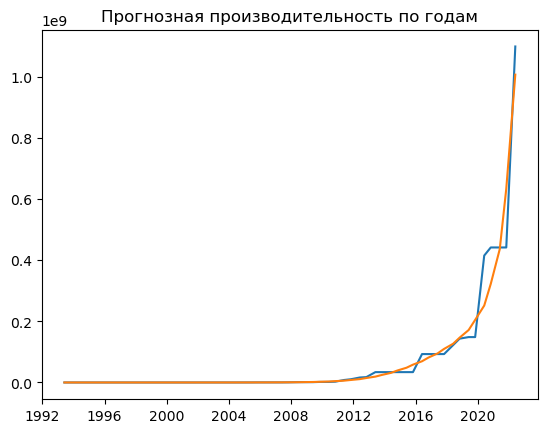

In [10]:
plt.plot(X,y)
plt.plot(X,np.exp(pipeline.predict(A)))
plt.title('Прогнозная производительность по годам')

In [9]:
pipeline = Pipeline(
                    [
                    ('poly', PolynomialFeatures(degree=6)),
                    ('lr', LinearRegression())
                    ])
pipeline.fit(A,np.log(y)) 
pred = pipeline.predict(Date_2025)
print('Прогнозная производительность компьютера №1 в 2025:', f'{np.exp(pred)[0]:.2e}')

Прогнозная производительность компьютера №1 в 2025: 2.41e+12


# 2. оцените какой процент всего производимого на Земле электричества потребляют все компьютеры из top500 (на основании открытых данных top500.org)
(50%)

По информации из Wikipedia возьмем данные о производимом в мире электричестве 

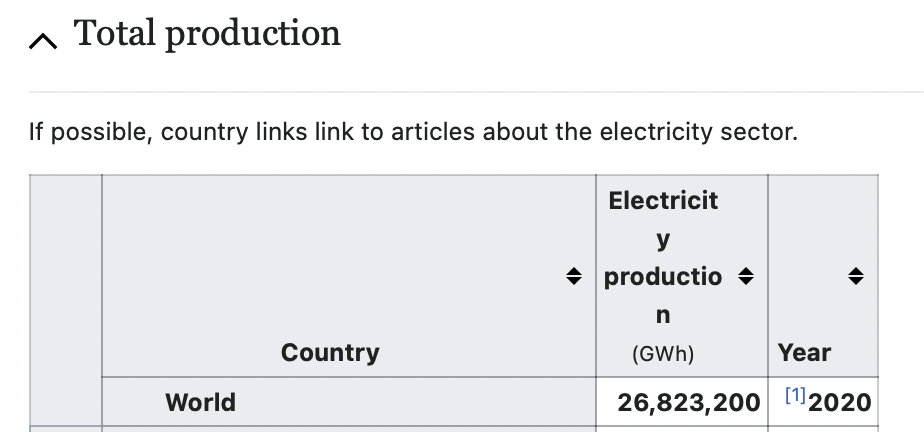

In [21]:
WORLD_EP = 2.682e7 #GWh за 2020 год

In [254]:
# Посмотрим на топ 500 суперкомпьютеров
data = pd.read_excel('TOP500_202206.xlsx')
data.head()

,Rank,Previous Rank,First Appearance,First Rank,Name,Computer,Site,Manufacturer,Country,Year,...,Accelerator/Co-Processor,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Continent,Site ID,System ID
0,1,NaN,59,1,Frontier,"HPE Cray EX235a, AMD Optimized 3rd Generation ...",DOE/SC/Oak Ridge National Laboratory,HPE,United States,2021,...,AMD Instinct MI250X,64,AMD Milan,HPE Cray EX235a,HPE Cray EX,Gigabit Ethernet,Slingshot-11,North America,48553,180047
1,2,1.0,55,1,Supercomputer Fugaku,"Supercomputer Fugaku, A64FX 48C 2.2GHz, Tofu i...",RIKEN Center for Computational Science,Fujitsu,Japan,2020,...,None,48,Fujitsu A64FX,Supercomputer Fugaku,Fujitsu Cluster,Proprietary Network,Tofu interconnect D,Asia,50831,179807
2,3,NaN,59,3,LUMI,"HPE Cray EX235a, AMD Optimized 3rd Generation ...",EuroHPC/CSC,HPE,Finland,2022,...,AMD Instinct MI250X,64,AMD Milan,HPE Cray EX235a,HPE Cray EX,Gigabit Ethernet,Slingshot-11,Europe,50908,180048
3,4,2.0,51,1,Summit,"IBM Power System AC922, IBM POWER9 22C 3.07GHz...",DOE/SC/Oak Ridge National Laboratory,IBM,United States,2018,...,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,48553,179397
4,5,3.0,51,3,Sierra,"IBM Power System AC922, IBM POWER9 22C 3.1GHz,...",DOE/NNSA/LLNL,IBM / NVIDIA / Mellanox,United States,2018,...,NVIDIA Volta GV100,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,49763,179398


In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Rank                              500 non-null    int64  
 1   Previous Rank                     461 non-null    float64
 2   First Appearance                  500 non-null    int64  
 3   First Rank                        500 non-null    int64  
 4   Name                              359 non-null    object 
 5   Computer                          500 non-null    object 
 6   Site                              500 non-null    object 
 7   Manufacturer                      500 non-null    object 
 8   Country                           500 non-null    object 
 9   Year                              500 non-null    int64  
 10  Segment                           500 non-null    object 
 11  Total Cores                       500 non-null    int64  
 12  Accelera

Так как очень много данных о энергопотреблении Power (kW) отстутствует, обучим простую линейную регрессию для заполнения пропусков

In [256]:
# Отберем признаки для обучения модели
cat_cols = ['Country', 'Processor Technology']
num_cols = ['Year','Total Cores', 'Rmax [TFlop/s]', 'Rpeak [TFlop/s]', 'Nmax', 
           'Processor Speed (MHz)', 'Cores per Socket', 'Power (kW)']

In [265]:
df = data[cat_cols + num_cols]
df.head()

,Country,Processor Technology,Year,Total Cores,Rmax [TFlop/s],Rpeak [TFlop/s],Nmax,Processor Speed (MHz),Cores per Socket,Power (kW)
0,United States,AMD Zen-3 (Milan),2021,8730112,1102000.0,1685651.46,24440832.0,2000,64,21100.00
1,Japan,Fujitsu ARM,2020,7630848,442010.0,537212.00,21288960.0,2200,48,29899.23
2,Finland,AMD Zen-3 (Milan),2022,1110144,151900.0,214351.87,8709120.0,2000,64,2942.13
3,United States,Power,2018,2414592,148600.0,200794.88,16473600.0,3070,22,10096.00
4,United States,Power,2018,1572480,94640.0,125712.00,11902464.0,3100,22,7438.28


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                500 non-null    object 
 1   Processor Technology   500 non-null    object 
 2   Year                   500 non-null    int64  
 3   Total Cores            500 non-null    int64  
 4   Rmax [TFlop/s]         500 non-null    float64
 5   Rpeak [TFlop/s]        500 non-null    float64
 6   Nmax                   496 non-null    float64
 7   Processor Speed (MHz)  500 non-null    int64  
 8   Cores per Socket       500 non-null    int64  
 9   Power (kW)             191 non-null    float64
dtypes: float64(4), int64(4), object(2)
memory usage: 39.2+ KB


In [267]:
# Заполним пропуски средним
df['Nmax'].fillna(df['Nmax'].mean(), inplace=True)

/var/folders/b7/t1bwy2bj38s0vjf_n9kzhzjw0000gq/T/ipykernel_12510/685233745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nmax'].fillna(df['Nmax'].mean(), inplace=True)


In [268]:
#OneHotEncoding
df_cat = pd.get_dummies(df[cat_cols])
df_cat.shape

(500, 50)

In [269]:
train_df = pd.concat([df[num_cols], df_cat], axis=1)

In [270]:
# Отберем данные без пропусков
train = train_df.dropna()
pred = train_df.drop(train.index)
train.shape, pred.shape

((191, 58), (309, 58))

In [271]:
X, y = train.drop(['Power (kW)'], axis=1), train['Power (kW)']
X_val = pred.drop(['Power (kW)'], axis=1).dropna()
df_val = train_df.drop(['Power (kW)'], axis=1).dropna()
lr = LinearRegression()
lr.fit(X, y)
pow_preds = lr.predict(X_val)
X_val['Power (kW)'] = np.abs(pow_preds)
data_pred = pd.concat([train, X_val], axis=0)

In [272]:
# проссумируюем за все суперкомпьрютеры топ500
pow_sum = data_pred['Power (kW)'].sum()

In [273]:
pow_sum_GWh = pow_sum * 10e-7 * 24 # работа компьютеров за сутки

In [274]:
prop_pow_world = pow_sum_GWh / WORLD_EP
print(round(prop_pow_world * 100, 5), '%')

6e-05 %


Процент потребления суперкомпьютерами из top500 от всего производимого на Земле электричества составляет 0,00006 % 